### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

去重前的数据量: 20358
去重后的数据量: 19779
缺失值情况（去掉 gravatar_id 后）:
 actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8976
blog                   11262
location                7079
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at      

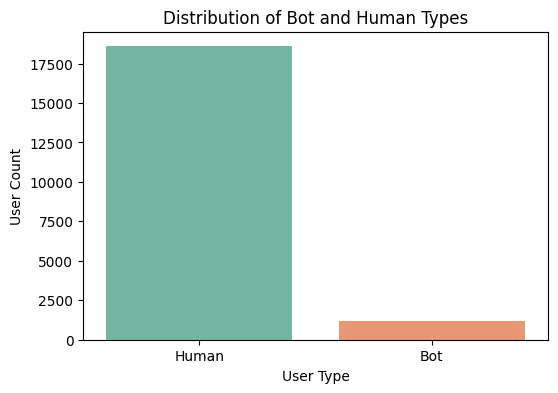

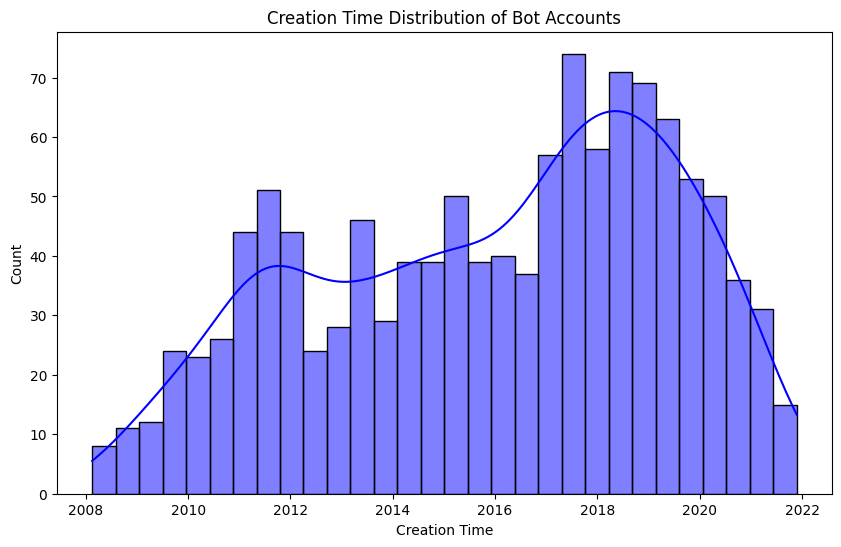

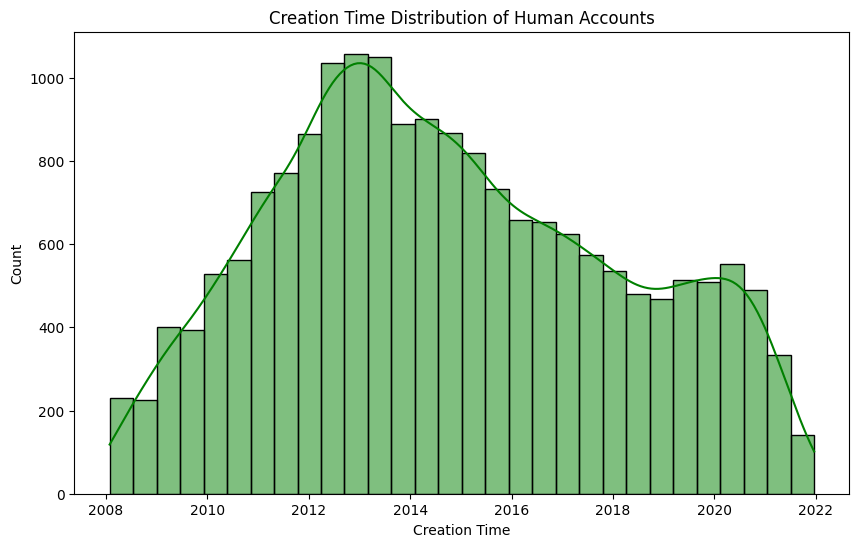

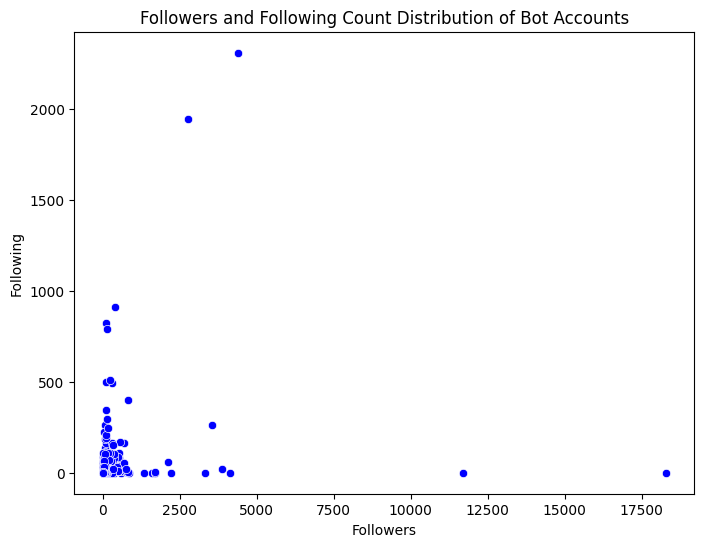

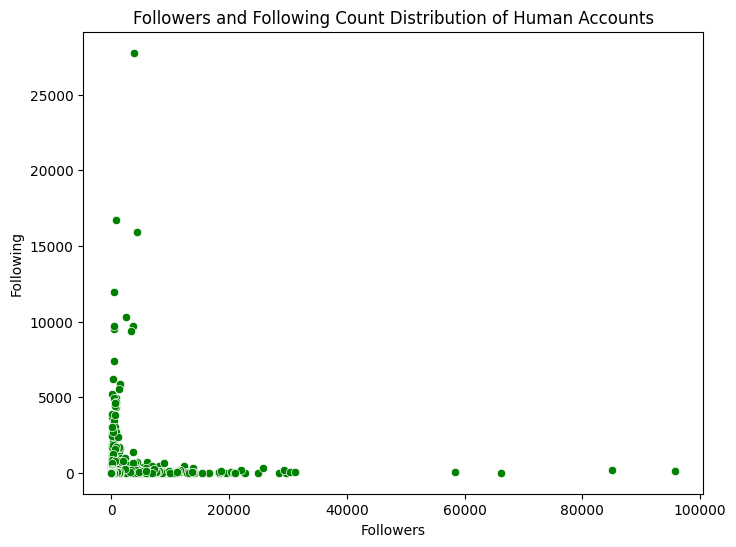

In [ ]:
import pandas as pd
raw_data = pd.read_csv(r'C:\Users\王志鸿\Desktop\导论\github_bot_raw_data.csv')
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

# 删除重复数据
data_before_deduplication = data.shape[0]  # 去重前数据量
data = data.drop_duplicates()  # 删除重复行
data_after_deduplication = data.shape[0]  # 去重后数据量

# 输出去重前后的数据量
print(f"去重前的数据量: {data_before_deduplication}")
print(f"去重后的数据量: {data_after_deduplication}")

# 去掉 gravatar_id 列
data = data.drop(columns=['gravatar_id'])

# 查看各列缺失值情况
missing_values_before = data.isnull().sum()
print("缺失值情况（去掉 gravatar_id 后）:\n", missing_values_before)

# 转化为布尔类型的列
boolean_columns = ['hireable', 'site_admin']  # 可以转化为布尔类型的列
data[boolean_columns] = data[boolean_columns].fillna(False).astype(bool)  # 填充缺失值并转为布尔类型

# 文本数据用空字符串填充空值
text_columns = ['company', 'location', 'email', 'bio', 'twitter_username', 'blog']
data[text_columns] = data[text_columns].fillna('')  # 填充空值为空字符串

# 再次查看缺失值情况
missing_values_after = data.isnull().sum()
print("缺失值情况（处理后）:\n", missing_values_after)

# 将 'created_at' 和 'updated_at' 转为时间戳格式
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# 检查转换后的数据
print(data[['created_at', 'updated_at']].head())

import matplotlib.pyplot as plt
import seaborn as sns

# 绘制 bot 和 human 类型的分布
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='label', palette='Set2')
plt.title('Distribution of Bot and Human Types')
plt.xlabel('User Type')
plt.ylabel('User Count')
plt.show()



# 筛选出 bot 类型账号
bot_data = data[data['label'] == 'Bot']

# 绘制 bot 类型账号的创建时间分布
plt.figure(figsize=(10, 6))
sns.histplot(bot_data['created_at'], kde=True, bins=30, color='blue')
plt.title('Creation Time Distribution of Bot Accounts')
plt.xlabel('Creation Time')
plt.ylabel('Count')
plt.show()


# 筛选出 human 类型账号
human_data = data[data['label'] == 'Human']

# 绘制 human 类型账号的创建时间分布
plt.figure(figsize=(10, 6))
sns.histplot(human_data['created_at'], kde=True, bins=30, color='green')
plt.title('Creation Time Distribution of Human Accounts')
plt.xlabel('Creation Time')
plt.ylabel('Count')
plt.show()



# 绘制 bot 类型账号的 followers 和 following 数量
plt.figure(figsize=(8, 6))
sns.scatterplot(data=bot_data, x='followers', y='following', color='blue')
plt.title('Followers and Following Count Distribution of Bot Accounts')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

# 绘制 human 类型账号的 followers 和 following 数量
plt.figure(figsize=(8, 6))
sns.scatterplot(data=human_data, x='followers', y='following', color='green')
plt.title('Followers and Following Count Distribution of Human Accounts')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

